Editing Kevin's code to work for us, this ipynb shows the process (or a truncated version) of how I got the wavelength solution. Outputs the wavelength solution as a txt file, which can be used in all of our calibrated photos

In [1]:
import numpy as np
from astropy.io import fits
from scipy.ndimage import rotate
import matplotlib.pyplot as plt
from astropy.convolution import convolve, Box1DKernel
from specutils.manipulation import box_smooth
import pandas as pd
import glob
import sys

pathname = "/Users/Kalvyn/Desktop/Obs2/APO_Data/"

In [2]:
stdfiles = glob.glob(pathname+"std*.R.fits")
std_dat = glob.glob(pathname+"std*.dat")

df = pd.read_csv(std_dat[0],delimiter='\s+',names=["Angstroms","Flux"])
df

,Angstroms,Flux
0,1140.6,8.792750e-12
1,1141.6,1.015690e-11
2,1142.6,9.614450e-12
3,1143.6,8.984610e-12
4,1144.6,8.923840e-12
...,...,...
3751,10225.0,7.385700e-15
3752,10229.9,7.400500e-15
3753,10234.8,7.541600e-15
3754,10239.6,7.291100e-15


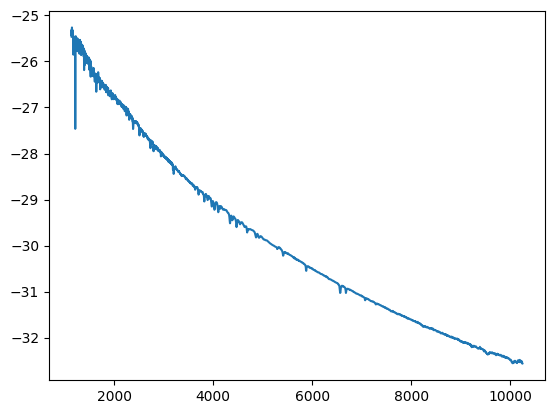

In [3]:
plt.plot(df["Angstroms"],np.log(df["Flux"]));

In [4]:
print(stdfiles)

['/Users/Kalvyn/Desktop/Obs2/APO_Data\\std_hz44.0001b.C.B.D.F.R.fits']


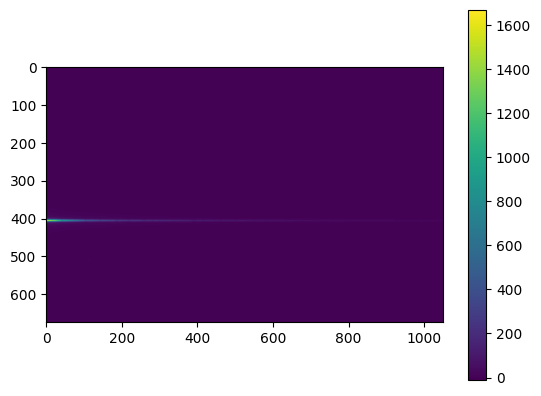

In [5]:
std = fits.open(stdfiles[0])
std_data = std[0].data
plt.imshow(std_data)
plt.colorbar()

In [6]:
argmax_array = np.array([])
y,x = std_data.shape
for i in range(x):
    argmax_array = np.append(argmax_array, np.argmax(std_data[:,i]))
median = int(np.median(argmax_array))

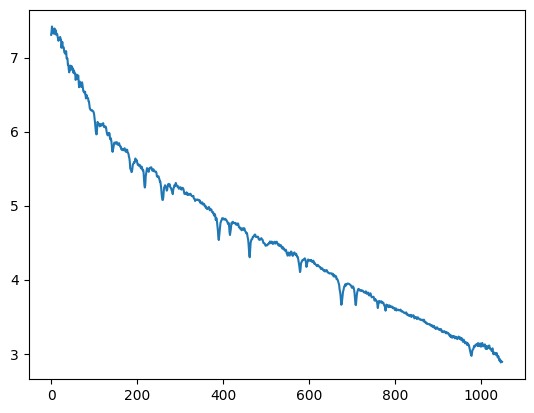

In [7]:
plt.plot(np.log(std_data[median,:]))

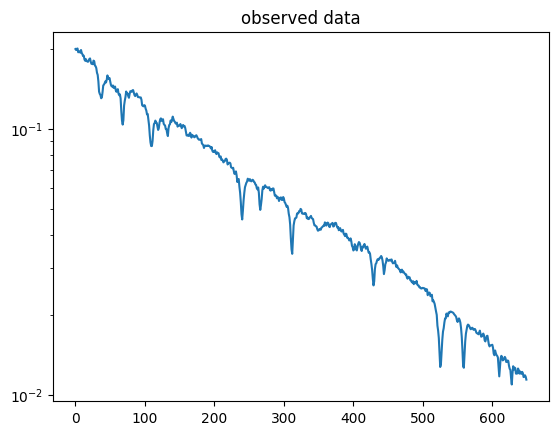

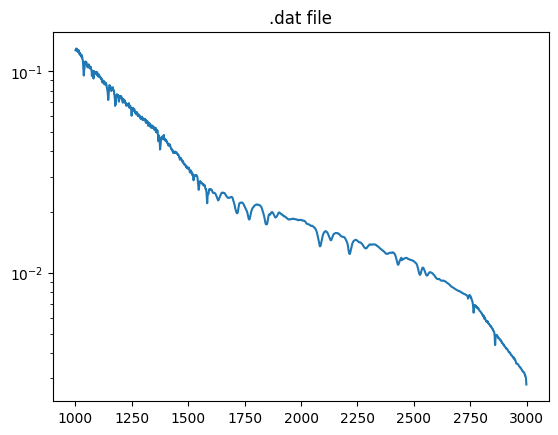

In [8]:
data = std_data[median,:]
dat = df["Flux"]
data = (data-np.min(data))/(np.max(data)-np.min(data))
dat = (dat-np.min(dat))/(np.max(dat)-np.min(dat))
plt.plot(data[150:800])
plt.yscale('log')
plt.title("observed data")
plt.show()
plt.plot(dat[1000:3000])
plt.yscale('log')
plt.title(".dat file");

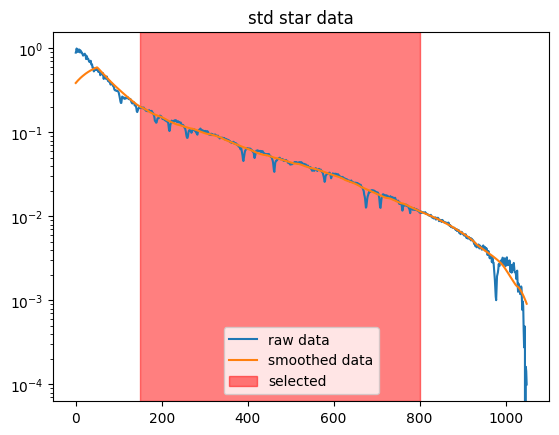

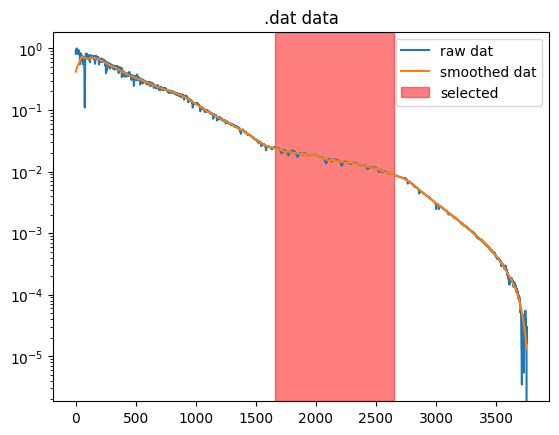

In [9]:
data_smooth = convolve(data, Box1DKernel(100))
dat_smooth = convolve(dat, Box1DKernel(100))
plt.plot(data,label="raw data")
plt.plot(data_smooth,label="smoothed data")
plt.axvspan(150, 800, color='red', alpha=0.5,label="selected")
plt.yscale('log')
plt.title("std star data")
plt.legend()
plt.show()
plt.plot(dat,label="raw dat")
plt.plot(dat_smooth,label="smoothed dat")
plt.yscale('log')
plt.axvspan(1660, 2650, color='red', alpha=0.5,label="selected")
plt.legend()
plt.title(".dat data");

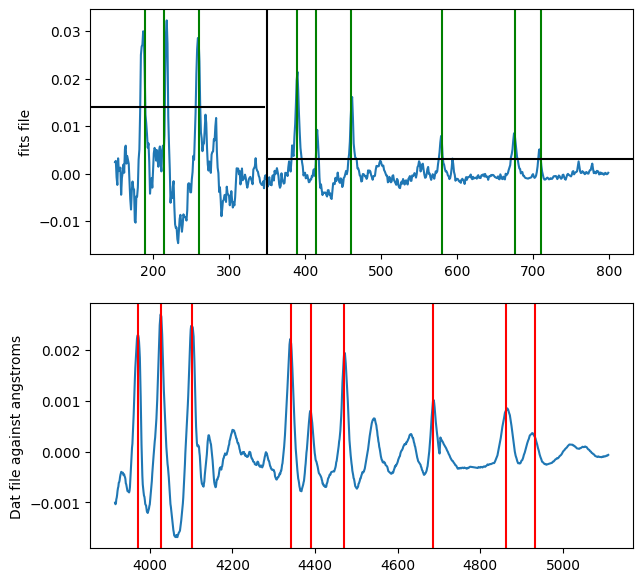

In [80]:
data_new = (data-data_smooth)*-1
dat_new = (dat-dat_smooth)*-1
fix, ax = plt.subplots(2,figsize=(7,7))
ax[0].plot(np.arange(150,800),data_new[150:800])
ax[0].axvline(190,color='green')#
ax[0].axvline(215,color='green')#
ax[0].axvline(260,color='green')#
ax[0].axvline(390,color='green')#
ax[0].axvline(415,color='green')#
ax[0].axvline(460,color='green')#
# ax[0].axvline(500,color='green')##
# ax[0].axvline(550,color='green')##
ax[0].axvline(580,color='green')#
# ax[0].axvline(595,color='green')#
ax[0].axvline(676,color='green')#
ax[0].axvline(710,color='green')#
ax[0].axhline(0.014,0,0.32,color="black")
ax[0].axhline(0.0030,0.33,1,color="black")
ax[0].axvline(350,color="black")
ax[0].set_ylabel("fits file")

ax[1].plot(df['Angstroms'][1660:2650],dat_new[1660:2650]);
# ax[1].plot(dat_new[1660:2650]);
ax[1].axvline(df["Angstroms"][1715],color='red')#
ax[1].axvline(df["Angstroms"][1770],color='red')#
ax[1].axvline(df["Angstroms"][1845],color='red')#
ax[1].axvline(df["Angstroms"][2085],color='red')#
ax[1].axvline(df["Angstroms"][2135],color='red')#
ax[1].axvline(df["Angstroms"][2215],color='red')#
# ax[1].axvline(df["Angstroms"][2285],color='red')#
# ax[1].axvline(df["Angstroms"][2370],color='red')#
ax[1].axvline(df["Angstroms"][2430],color='red')#
# ax[1].axvline(df["Angstroms"][2450],color='red')#
ax[1].axvline(df["Angstroms"][2525],color='red')#
ax[1].axvline(df["Angstroms"][2560],color='red')
ax[1].set_ylabel("Dat file against angstroms");

In [81]:
print("190 = ",df["Angstroms"][1715])
print("215 = ",df["Angstroms"][1770])
print("260 = ",df["Angstroms"][1845])
print("390 = ",df["Angstroms"][2085])
print("415 = ",df["Angstroms"][2135])
print("460 = ",df["Angstroms"][2215])
# print("500 = ",df["Angstroms"][2285])
# print("550 = ",df["Angstroms"][2370])
print("580 = ",df["Angstroms"][2430])
# print("595 = ",df["Angstroms"][2450])
print("676 = ",df["Angstroms"][2525])
print("710 = ",df["Angstroms"][2560])

190 =  3971.12
215 =  4026.14
260 =  4101.16
390 =  4341.22
415 =  4391.23
460 =  4471.25
580 =  4686.31
676 =  4861.36
710 =  4931.38


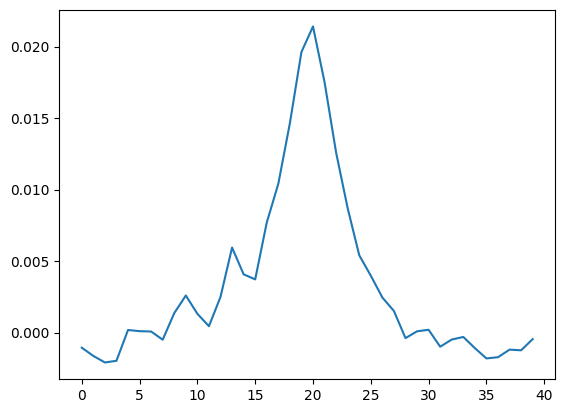

In [82]:
from astropy.modeling import models, fitting
plt.plot(data_new[370:410])

In [83]:
fitfunc = fitting.LevMarLSQFitter()

testline = data_new[370:410] # edited
testx = np.arange(len(testline)) + 370 #edited
test_model = models.Gaussian1D(amplitude=testline.max(),mean=np.median(testx),stddev=np.std(testx)) + models.Const1D(amplitude=testline.min())
test_fit = fitfunc(test_model, testx, testline)

arcwidth = test_fit[0].stddev.value
offset = test_fit[1].amplitude.value
window = int(4*test_fit[0].stddev.value)  # line fitting window

In [84]:
#line near 190 correpsonds to 3971.12

line0 = data_new[190-window:190+window+1]
x0 = np.arange(len(line0)) + 190-window 
line_model0 = models.Gaussian1D(amplitude=line0.max(),mean=np.median(x0),stddev=arcwidth) + models.Const1D(amplitude=offset)
line_fit0 = fitfunc(line_model0, x0, line0)

#line near 710 correpsonds to 4931.38

line1 = data_new[710-window:710+window+1]
x1 = np.arange(len(line1)) + 710 - window 
line_model1 = models.Gaussian1D(amplitude=line1.max(),mean=np.median(x1),stddev=arcwidth) + models.Const1D(amplitude=offset)
line_fit1 = fitfunc(line_model1, x1, line1)

disp0 = (4931.38 - 3971.12) / (line_model1[0].mean.value - line_model0[0].mean.value)

wavsol0 = models.Linear1D(slope=disp0,intercept=-disp0*line_model0[0].mean.value + 3971.12)

[ 34  35  36  37  38  39  66  67  68  69 107 108 109 110 111 112 233 234
 235 236 237 238 239 240 241 242 243 244 245 265 266 267 268 308 309 310
 311 312 313 314 315 316 427 428 429 430 431 521 522 523 524 525 526 527
 528 529 558 559 560]
[ 0  6 10 16 29 33 42 47 56 -1]
[186 217 259 388 416 461 578 674 708]
[3971.12 4026.14 4101.16 4341.22 4391.23 4471.25 4686.31 4711.32 4861.36
 4931.38]
[3965.38224719 4022.30655303 4098.90460806 4339.96932152 4388.49829806
 4472.62145521 4689.26067313 4867.38891078 4928.69431153]


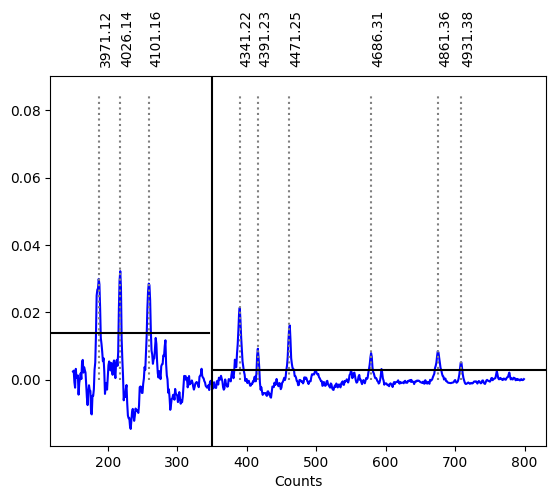

In [120]:
# lineselect = np.array([df['Angstroms'][1715],df['Angstroms'][1770],df['Angstroms'][1845],df['Angstroms'][2085]\
#                       ,df['Angstroms'][2135],df['Angstroms'][2215],df['Angstroms'][2285],df['Angstroms'][2370]\
#                       ,df['Angstroms'][2430],df['Angstroms'][2450],df['Angstroms'][2525],df['Angstroms'][2560]])
lineselect = np.array([df['Angstroms'][1715],df['Angstroms'][1770],df['Angstroms'][1845],df['Angstroms'][2085]\
                      ,df['Angstroms'][2135],df['Angstroms'][2215]\
                      ,df['Angstroms'][2430],df['Angstroms'][2450],df['Angstroms'][2525],df['Angstroms'][2560]]) # edited
px = np.arange(150,800)
thresh1 = 0.014 # edited
thresh2 = 0.0034
#finding lines to fit -- examine this closely to understand how this works
index1 = np.where(data_new[150:350] > thresh1)[0]
index2 = np.where(data_new[350:800] > thresh2)[0]+200
# print(index1,index2)
# index = np.where(data_new[150:800] > thresh)[0] # edited
index = np.concatenate((index1,index2),axis=None)
# print(index)
ii = np.where(np.diff(index) > 1)[0]+1
ii = np.append(0,ii)
numlines = len(ii)
ii = np.append(ii,-1)
print(index)
print(ii)
pxcen0 = []

figB, axB = plt.subplots()

for k in range(1,numlines+1):
    # print("ii: ",ii[k-1],ii[k])
    # print("index: ",index[ii[k-1]],index[ii[k]-1])
    # print("graph: ",index[ii[k-1]]+150,index[ii[k]-1]+150)
    # axB.axvspan(index[ii[k-1]]+150,index[ii[k]-1]+150, color='red', alpha=0.5)
    temp = int( np.median( index[ii[k-1]:ii[k]-1]) )
    pxcen0.append(temp+150)

# pxcen0.append(int(np.median(index[ii[-1]:])) )
pxcen0 = np.array(pxcen0).flatten()
print(pxcen0)

pxcen = np.zeros(len(pxcen0))  # initialize array to contain fitted line centers

for k in range(len(pxcen0)):
    testline = data_new[pxcen0[k]-window:pxcen0[k]+window+1]
    testx = np.arange(len(testline)) + pxcen0[k]-window
    test_model = models.Gaussian1D(amplitude=testline.max(),mean=np.median(testx),stddev=arcwidth) + models.Const1D(amplitude=offset)
    test_fit = fitfunc(test_model, testx, testline)
    
    pxcen[k] = test_fit[0].mean.value

# print(pxcen)
## need to match up lines in database to the pixel centroids in `pxcen' ; this will work better if wavsol0 uses multple lines not just 2, adjust manually
lcen_init = wavsol0(pxcen)

wavarray = np.zeros(len(pxcen))
# print(lineselect)
# lineselect = linedatabase.copy() # edited

print(lineselect)
print(lcen_init)
for k in range(len(lcen_init)):
    idiff = np.abs(lineselect - lcen_init[k]).argmin()
    wavarray[k] = lineselect[idiff]
    lineselect = np.delete(lineselect,idiff)

# print(wavarray)

axB.plot(px,data_new[150:800],'b',markersize=1)

axB.vlines(pxcen,0,data_new.max(),linestyles=':',color='gray')    

for i in range(len(wavarray)):
    axB.text(pxcen[i],data_new.max()*1.1,"{0}".format(wavarray[i]),rotation=90)


axB.set_xlabel("Pixel Position")
axB.set_xlabel("Counts")
axB.axhline(0.014,0,0.32,color="black")
axB.axhline(0.003,0.33,1,color="black")
# axB.axhline(0.0034,color='black')
axB.axvline(350,color="black")
# axB.set_xlim(150+200,150+600)

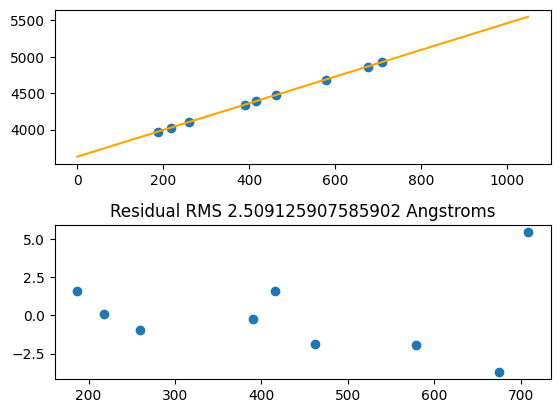

In [121]:
nx = len(data_new)
coef1 = np.polyfit(pxcen,wavarray,1)
wfun1 = np.poly1d(coef1)
dummyx = np.arange(nx) # edited

resid1 = wavarray - wfun1(pxcen)

fig01, ax01 = plt.subplots(nrows=2)

ax01[0].plot(pxcen,wavarray,'o')
ax01[0].plot(dummyx,wfun1(dummyx),color='orange')

ax01[1].plot(pxcen,resid1,'o')

ax01[1].set_title("Residual RMS {0} Angstroms".format(np.std(resid1) ) )
fig01.subplots_adjust(hspace=0.4)

In [125]:
print(f"{coef1[0]}x + {coef1[1]}")
f = open("wave_sol.txt", "w")
f.write("wavelength solution:\n")
f.write(f"{coef1[0]}x + {coef1[1]}")
f.close()

1.8334197867611897x + 3626.886436471805
